In [1]:
using Agents
using Random
using CairoMakie
using InteractiveDynamics

In [2]:
VERSION

v"1.8.2"

In [3]:
import Pkg
Pkg.status("Agents")

Status `~/.julia/environments/v1.8/Project.toml`
⌅ [46ada45e] Agents v5.14.0
Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated`


In [4]:
@agent RandomWalkerType1 ContinuousAgent{2} begin
    change_direction_prob::Float64
end

In [5]:
function initializeWalker1Model(;walker_num=1, speed=1, extent=(10,10))
    
    spacing = 1
    space_2D = ContinuousSpace(extent, spacing=spacing, periodic = true)
    
    seed = 123
    rand_rng = Random.MersenneTwister(seed)
    
    model = ABM(RandomWalkerType1, space_2D, rng=rand_rng, scheduler=Schedulers.Randomly())
    
    for _ in 1:walker_num
        change_direction_prob = max(0.4,rand())
        pos = (extent[1]/2,extent[2]/2)
        vel = Tuple(rand(2))
        agent = RandomWalkerType1(nextid(model), pos, vel, change_direction_prob)
        add_agent_pos!(agent, model)
    end
    return model
    
end

initializeWalker1Model (generic function with 1 method)

In [6]:
function walkerType1Step!(walker, model)
    
    time_step = 1
    
    function rotate_vector(v, θ)
        rotation_matrix = [cos(θ) -sin(θ); sin(θ) cos(θ)]
        return Tuple(rotation_matrix * collect(v))
    end
    
    if walker.change_direction_prob <= rand()
        rand_angle_rotate = rand() * 2pi
        walker.vel = rotate_vector(walker.vel, rand_angle_rotate)
        # move_agent!(agent::A, model::ABM{<:ContinuousSpace,A}, dt::Real)
        move_agent!(walker, model, time_step)
    end
    
end

walkerType1Step! (generic function with 1 method)

In [7]:
model_Walker1 = initializeWalker1Model()
model_Walker1

StandardABM with 1 agents of type RandomWalkerType1
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

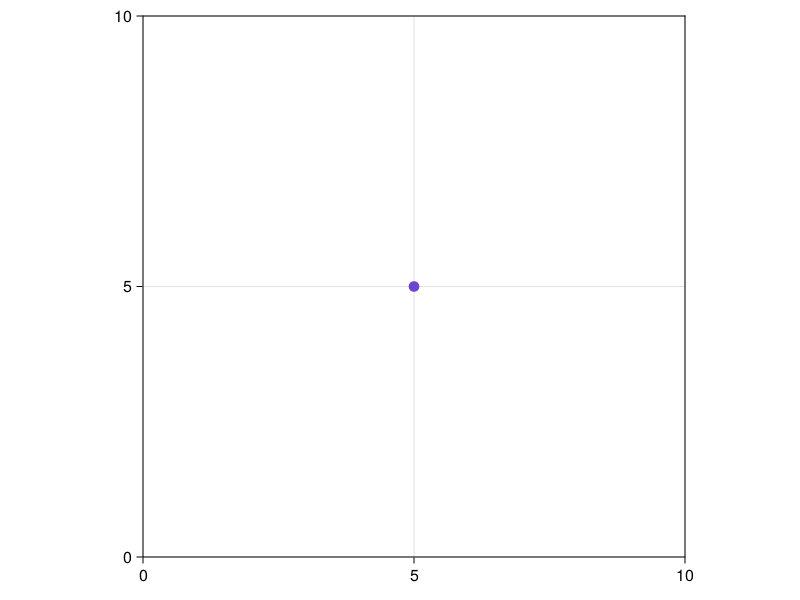

In [8]:
figure, = abmplot(model_Walker1; am=:circle)
figure

In [30]:
abmvideo(
    "plots/walker1.mp4", model_Walker1, walkerType1Step!;
    am = :circle,
    framerate = 2, frames = 50,
    title = "WalkerType1"
)

In [10]:
@agent RandomWalkerType2 ContinuousAgent{2} begin
end

In [11]:
function initializeWalker2Model(;walker_num=1, speed=1, extent=(10,10))
    
    spacing = 1
    space_2D = ContinuousSpace(extent, spacing=spacing, periodic=true)

    seed = 123
    rand_rng = Random.MersenneTwister(seed)
    
    model = ABM(RandomWalkerType2, space_2D, rng=rand_rng, scheduler=Schedulers.Randomly())
    
    for _ in 1:walker_num
        pos = (extent[1]/2 + 1,extent[2]/2 + 1)
        vel = (max(0.4,rand()),max(0.4,rand()))
        agent = RandomWalkerType2(nextid(model), pos, vel)
        add_agent_pos!(agent, model)
    end
    return model
    
end

initializeWalker2Model (generic function with 1 method)

In [12]:
function walkerType2Step!(walker, model)
    
    randomwalk!(walker,model,1)
    
end

walkerType2Step! (generic function with 1 method)

In [13]:
model_Walker2 = initializeWalker2Model()
model_Walker2

StandardABM with 1 agents of type RandomWalkerType2
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

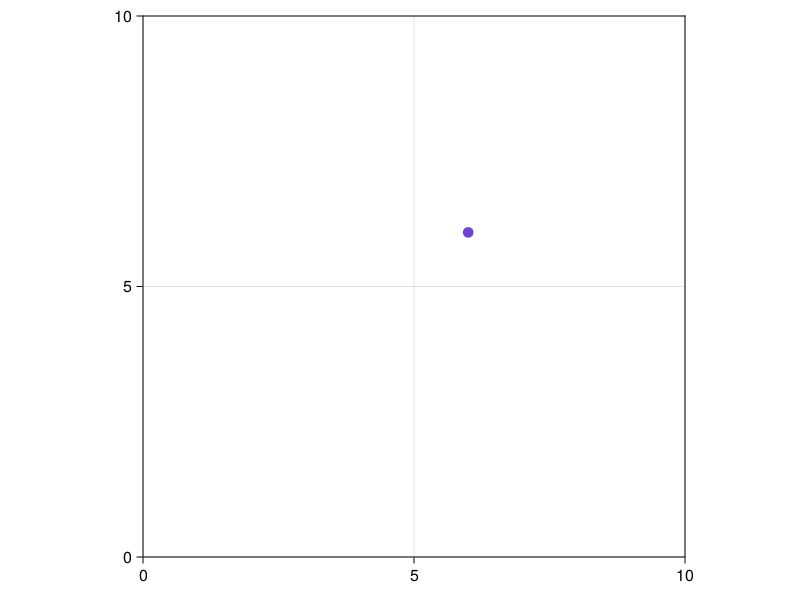

In [14]:
figure, = abmplot(model_Walker2; am=:circle)
figure

In [31]:
abmvideo(
    "plots/walker2.mp4", model_Walker2, walkerType2Step!;
    am = :circle,
    framerate = 2, frames = 50,
    title = "WalkerType2"
)

In [16]:
# multiple agent types

In [17]:
# use both types with multiple dispatch and the types
function walkerType1and2Step!(walker::RandomWalkerType1, model)
    
    time_step = 1
    
    function rotate_vector(v, θ)
        rotation_matrix = [cos(θ) -sin(θ); sin(θ) cos(θ)]
        return Tuple(rotation_matrix * collect(v))
    end
    
    if walker.change_direction_prob <= rand()
        rand_angle_rotate = rand() * 2pi
        walker.vel = rotate_vector(walker.vel, rand_angle_rotate)
        # move_agent!(agent::A, model::ABM{<:ContinuousSpace,A}, dt::Real)
        move_agent!(walker, model, time_step)
    end
    
end

function walkerType1and2Step!(walker::RandomWalkerType2, model)
    
    randomwalk!(walker,model,1)
    
end

walkerType1and2Step! (generic function with 2 methods)

In [33]:
function initializeWalker1and2Model(;walker_num=1, speed=1, extent=(10,10))
    
    spacing = 1
    space_2D = ContinuousSpace(extent, spacing=spacing, periodic = true)
    
    seed = 123
    rand_rng = Random.MersenneTwister(seed)
    
    agent_types = Union{RandomWalkerType1, RandomWalkerType2}

    model = ABM(agent_types, space_2D, rng=rand_rng, scheduler=Schedulers.Randomly())
    
    for _ in 1:walker_num
        #add type 1
           
        change_direction_prob = max(0.4,rand())
        pos = (extent[1]/2,extent[2]/2)
        vel = Tuple(rand(2))
        agent = RandomWalkerType1(nextid(model), pos, vel, change_direction_prob)
        add_agent_pos!(agent, model)

        #add type 2
        pos = (extent[1]/2 + 1,extent[2]/2 + 1)
        vel = (max(0.4,rand()),max(0.4,rand()))
        agent = RandomWalkerType2(nextid(model), pos, vel)
        add_agent_pos!(agent, model)
        
    end
    return model
    
end

initializeWalker1and2Model (generic function with 1 method)

In [34]:
modelWalkers1and2 = initializeWalker1and2Model()

┌ Warning: Agent type is not concrete. If your agent is parametrically typed, you're probably
│ seeing this warning because you gave `Agent` instead of `Agent{Float64}`
│ (for example) to this function. You can also create an instance of your agent
│ and pass it to this function. If you want to use `Union` types for mixed agent
│ models, you can silence this warning.
└ @ Agents ~/.julia/packages/Agents/PhazO/src/core/model_concrete.jl:139


StandardABM with 2 agents of type Union{RandomWalkerType1, RandomWalkerType2}
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

In [35]:
function MakerType1and2(agent) 
    if agent isa RandomWalkerType1
        return :circle
    elseif agent isa RandomWalkerType2
        return :utriangle
    end    
end

function ColorType1and2(agent) 
    if agent isa RandomWalkerType1
        return :blue
    elseif agent isa RandomWalkerType2
        return :orange
    end    
end

ColorType1and2 (generic function with 1 method)

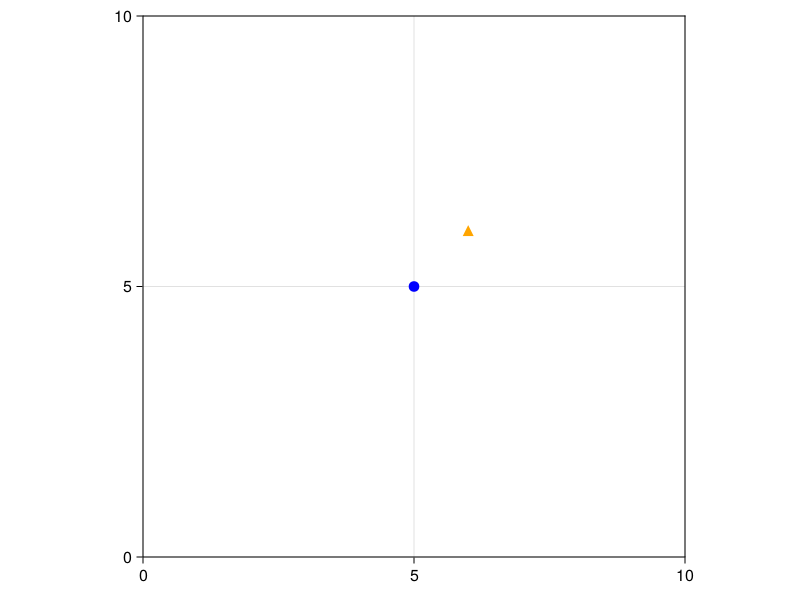

In [36]:
plotkwargs = (; ac=ColorType1and2, am=MakerType1and2)
figure, = abmplot(modelWalkers1and2; plotkwargs...)
figure

In [37]:
abmvideo(
    "plots/walker1and2.mp4", modelWalkers1and2, walkerType1and2Step!;
    framerate = 2, frames = 50,
    title = "WalkerType1and2", plotkwargs...
)

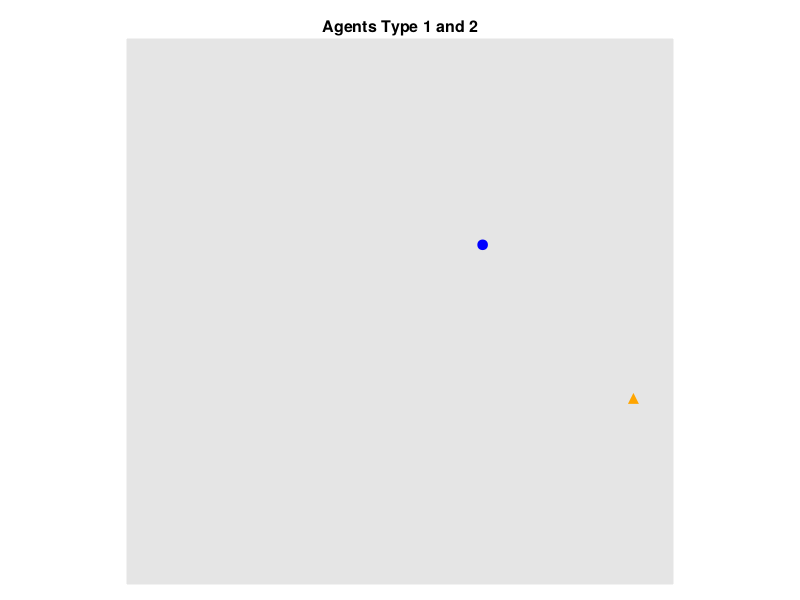

In [68]:
fontsize_theme =Theme(
    Axis = (
        backgroundcolor = :gray90,
        leftspinevisible = false,
        rightspinevisible = false,
        bottomspinevisible = false,
        topspinevisible = false,
        xgridcolor = :gray90,
        ygridcolor = :gray90,
        xticksvisible = false,
        yticksvisible = false,
        xticklabelsvisible = false,
        yticklabelsvisible = false
                
    ))
set_theme!(fontsize_theme)

plotkwargs = (; ac=ColorType1and2, am=MakerType1and2)
figure, = abmplot(modelWalkers1and2; plotkwargs...)
ax = Axis(figure[1,1], aspect = DataAspect(), title = "Agents Type 1 and 2")
hidedecorations!(ax)

figure

In [25]:
modelWalkers1and2

StandardABM with 2 agents of type Union{RandomWalkerType1, RandomWalkerType2}
 space: periodic continuous space with (10.0, 10.0) extent and spacing=1.0
 scheduler: Agents.Schedulers.Randomly

In [26]:
t =getproperty(modelWalkers1and2, :space)

periodic continuous space with (10.0, 10.0) extent and spacing=1.0

In [27]:
t.extent

(10.0, 10.0)

In [28]:
t.spacing

1.0

In [29]:
collect( allagents(modelWalkers1and2) )

2-element Vector{Union{RandomWalkerType1, RandomWalkerType2}}:
 RandomWalkerType2(2, (9.814062725264058, 4.243998283654099), (-0.6347483799824445, -0.7727188972127332))
 RandomWalkerType1(1, (5.269884131084548, 7.090304768464578), (-0.16934912688026496, 0.6704245986089022), 0.9575615592036967)